In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Statistics Assignment-3 (Hypothesis Tests) (DS-12/22 EU)

####EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and  standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [22]:
mü = 13.20
sigma = 2.50
n = 40
xbar = 12.20
CL = 0.99
sem = 2.50/40**0.5

####EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

###CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [3]:
df = pd.read_csv('soil.csv')
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [4]:
df.Soil1.value_counts(dropna=True)

1.976    2
1.754    1
1.708    1
1.740    1
1.737    1
1.896    1
1.714    1
1.550    1
2.054    1
1.613    1
1.570    1
1.932    1
1.863    1
1.589    1
1.442    1
1.943    1
1.640    1
1.665    1
1.653    1
1.866    1
1.578    1
1.685    1
1.347    1
1.499    1
1.641    1
1.553    1
1.912    1
1.110    1
1.548    1
Name: Soil1, dtype: int64

In [5]:
a = df.Soil1.value_counts(dropna=True).index
soil1 = [*a] + [1.976]
soil1

[1.976,
 1.754,
 1.708,
 1.74,
 1.737,
 1.896,
 1.714,
 1.55,
 2.054,
 1.613,
 1.57,
 1.932,
 1.863,
 1.589,
 1.442,
 1.943,
 1.64,
 1.665,
 1.653,
 1.866,
 1.578,
 1.685,
 1.347,
 1.499,
 1.641,
 1.553,
 1.912,
 1.11,
 1.548,
 1.976]

In [6]:
df.Soil2.value_counts(dropna=True)

1.364    1
1.489    1
1.183    1
1.367    1
1.144    1
1.151    1
1.561    1
1.192    1
1.379    1
1.557    1
1.501    1
1.277    1
1.593    1
1.172    1
1.510    1
1.740    1
1.053    1
1.094    1
1.878    1
1.589    1
1.337    1
1.828    1
1.371    1
1.428    1
1.119    1
1.373    1
1.714    1
1.542    1
1.260    1
1.492    1
1.395    1
1.778    1
1.611    1
1.202    1
1.355    1
Name: Soil2, dtype: int64

In [7]:
b = df.Soil2.value_counts(dropna=True).index
soil2 = [*b]
soil2

[1.364,
 1.489,
 1.183,
 1.367,
 1.144,
 1.151,
 1.561,
 1.192,
 1.379,
 1.557,
 1.501,
 1.277,
 1.593,
 1.172,
 1.51,
 1.74,
 1.053,
 1.094,
 1.878,
 1.589,
 1.337,
 1.828,
 1.371,
 1.428,
 1.119,
 1.373,
 1.714,
 1.542,
 1.26,
 1.492,
 1.395,
 1.778,
 1.611,
 1.202,
 1.355]

In [8]:
indTest = stats.ttest_ind(soil1, soil2, alternative='two-sided')
indTest

Ttest_indResult(statistic=5.16814733193433, pvalue=2.593228732352869e-06)

####EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

####Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
####Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

#####CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [9]:
pisa = pd.read_csv('PISA Test.csv')
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [10]:
EU = list(pisa[pisa['Continent_Code'] == 'EU']['Math'].values)
EU

[413.157,
 496.7423,
 506.9844,
 441.1899,
 521.2506,
 437.1443,
 492.3254,
 505.9713,
 511.0876,
 485.8432,
 519.5291,
 511.0769,
 492.9204,
 492.4785,
 453.6299,
 464.0401,
 476.8309,
 503.722,
 488.0332,
 489.7287,
 478.3834,
 485.7706,
 482.3051,
 419.6635,
 371.3114,
 478.6448,
 417.9341,
 512.2528,
 501.7298,
 504.4693,
 491.627,
 443.9543,
 494.06,
 475.2301,
 509.9196,
 493.9181,
 420.454]

In [11]:
AS = list(pisa[pisa['Continent_Code'] == 'AS']['Math'].values)
AS

[427.4827,
 531.2961,
 403.8332,
 547.931,
 386.1096,
 469.6695,
 380.259,
 532.4399,
 459.816,
 524.1062,
 396.2497,
 543.8078,
 446.1098,
 402.4007,
 564.1897,
 415.4638,
 494.5183]

In [12]:
indTest = stats.ttest_ind(EU, AS, alternative='two-sided')
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [13]:
df = pd.DataFrame({'EU': EU, 'AS': AS + ([np.nan] * 20)})
df

,EU,AS
0,413.1570,427.4827
1,496.7423,531.2961
2,506.9844,403.8332
3,441.1899,547.9310
4,521.2506,386.1096
5,437.1443,469.6695
6,492.3254,380.2590
7,505.9713,532.4399
8,511.0876,459.8160
9,485.8432,524.1062


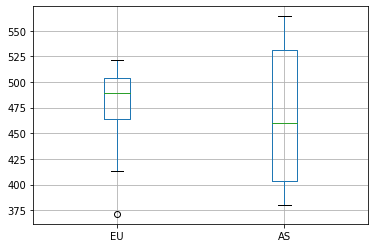

In [14]:
df.boxplot();

####EXERCISE 4.  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test

In [15]:
weight = pd.read_csv('/content/weight .csv') 
weight

,ID,starting,ending,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,76.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,81.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,86.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,71.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,88.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15 non-null     float64
 1   starting     15 non-null     float64
 2   ending       15 non-null     float64
 3   Unnamed: 3   1 non-null      object 
 4   Unnamed: 4   1 non-null      object 
 5   Unnamed: 5   6 non-null      object 
 6   Unnamed: 6   3 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   1 non-null      object 
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  3 non-null      object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  1 non-null      object 
 14  Unnamed: 14  1 non-null      object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  1 non-null      object 
dtypes: float

In [17]:
weight.isnull().sum()

ID             253
starting       253
ending         253
Unnamed: 3     267
Unnamed: 4     267
Unnamed: 5     262
Unnamed: 6     265
Unnamed: 7     265
Unnamed: 8     267
Unnamed: 9     268
Unnamed: 10    268
Unnamed: 11    265
Unnamed: 12    268
Unnamed: 13    267
Unnamed: 14    267
Unnamed: 15    268
Unnamed: 16    268
Unnamed: 17    268
Unnamed: 18    267
dtype: int64

In [18]:
weight.dropna(axis=1, thresh=10, inplace=True)
weight

,ID,starting,ending
0,1.0,76.0,72.0
1,2.0,81.0,82.0
2,3.0,86.0,84.0
3,4.0,71.0,71.0
4,5.0,88.0,83.0
...,...,...,...
263,NaN,NaN,NaN
264,NaN,NaN,NaN
265,NaN,NaN,NaN
266,NaN,NaN,NaN


In [19]:
weight.dropna(axis=0, thresh=1, inplace=True)
weight

,ID,starting,ending
0,1.0,76.0,72.0
1,2.0,81.0,82.0
2,3.0,86.0,84.0
3,4.0,71.0,71.0
4,5.0,88.0,83.0
5,6.0,78.0,74.0
6,7.0,76.0,70.0
7,8.0,81.0,80.0
8,9.0,79.0,78.0
9,10.0,77.0,79.0


In [20]:
pairedtest = stats.ttest_rel(weight.starting, weight.ending, alternative='greater', axis=0)
pairedtest

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)